In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import statsmodels.api as sm


In [180]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [181]:
%matplotlib inline

In [182]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases23052020.csv')

In [183]:
pd.set_option('display.max_columns', 60)

In [184]:
covid_ng.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
covid_ng.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10
93,2020-05-23 15:51:25,133,22,0,23,0,0,0,3,28,34,2,0,2,5,0,0,0,0,0,2,3,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,0,167,0
94,2020-05-24 15:10:08,148,36,13,12,0,0,0,0,19,7,4,3,0,5,0,0,8,27,0,0,2,0,0,0,0,1,0,6,0,0,0,8,0,0,3,11,0,89,5
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7


In [186]:
covid_ng.shape

(96, 40)

In [187]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [188]:
exp_wip = covid_ng.copy()

In [189]:
exp_wip.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [191]:
exp_wip.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth,South_West,South_South,South_East,North_Central,North_East,North_West
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11,174,29,0,17,26,82
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10,154,13,10,9,17,41
93,2020-05-23 15:51:25,133,22,0,23,0,0,0,3,28,34,2,0,2,5,0,0,0,0,0,2,3,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,0,167,0,190,28,4,11,5,5
94,2020-05-24 15:10:08,148,36,13,12,0,0,0,0,19,7,4,3,0,5,0,0,8,27,0,0,2,0,0,0,0,1,0,6,0,0,0,8,0,0,3,11,0,89,5,167,60,12,20,0,18
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7,105,13,27,12,8,50


In [192]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [193]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [194]:
exp_wip_col_clean.head()

,dates,lagos,abuja(fct),kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,dischared_revovered,dealth,south_west,south_south,south_east,north_central,north_east,north_west
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [196]:
exp_wip_col_clean.tail()

,dates,lagos,abuja,kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,discharged_recovered,death,south_west,south_south,south_east,north_central,north_east,north_west
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11,174,29,0,17,26,82
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10,154,13,10,9,17,41
93,2020-05-23 15:51:25,133,22,0,23,0,0,0,3,28,34,2,0,2,5,0,0,0,0,0,2,3,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,0,167,0,190,28,4,11,5,5
94,2020-05-24 15:10:08,148,36,13,12,0,0,0,0,19,7,4,3,0,5,0,0,8,27,0,0,2,0,0,0,0,1,0,6,0,0,0,8,0,0,3,11,0,89,5,167,60,12,20,0,18
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7,105,13,27,12,8,50


In [197]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [198]:
exp_wip_col_clean['total_daily_cases'].tail()

91    339
92    245
93    265
94    313
95    229
Name: total_daily_cases, dtype: int64

In [199]:
exp_wip_col_clean['death'].tail()

91    11
92    10
93     0
94     5
95     7
Name: death, dtype: int64

In [200]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [201]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [202]:
tidy_covid1.head()

,dates,discharged_recovered,death,total_daily_cases,south_west,south_south,south_east,north_central,north_east,north_west,states,cases_state
0,2020-02-27 15:40:38,0,0,1,1,0,0,0,0,0,lagos,1
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,lagos,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,lagos,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,lagos,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,lagos,0


In [203]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [204]:
tidy_covid_all.tail()

,dates,discharged_recovered,death,total_daily_cases,states,cases_state,geopolitical_zones,cases_zones
21307,2020-05-21 15:48:23,67,11,339,cross_river,0,north_west,82
21308,2020-05-22 15:35:01,100,10,245,cross_river,0,north_west,41
21309,2020-05-23 15:51:25,167,0,265,cross_river,0,north_west,5
21310,2020-05-24 15:10:08,89,5,313,cross_river,0,north_west,18
21311,2020-05-25 15:34:33,48,7,229,cross_river,0,north_west,50


###  Average Daily Cases By Geopolitical Zone

In [205]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [206]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [207]:
average_zones_cases

,geopolitical_zones,cases_zones
0,north_central,2.687500
1,north_east,7.572917
2,north_west,19.895833
3,south_east,1.052083
4,south_south,4.114583
5,south_west,43.385417


In [208]:
sns.set(style='whitegrid')

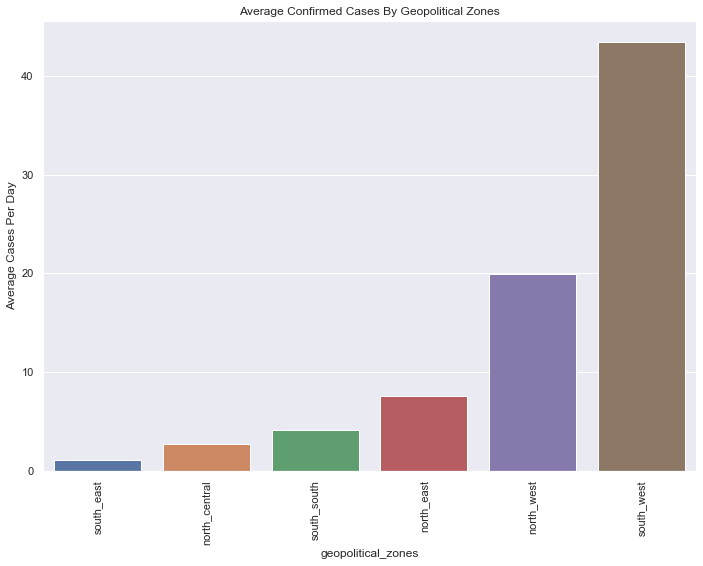

In [209]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='geopolitical_zones', y='cases_zones', data=average_zones_cases, order=['south_east','north_central','south_south','north_east','north_west','south_west']);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
ax.set_ylabel('Average Cases Per Day')
plt.xticks(rotation=90)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [210]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [211]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

,death,total_daily_cases,discharged_recovered
dates,,,
2020-02-27 15:40:38,0,1,0
2020-02-28 01:00:36,0,0,0
2020-02-29 02:26:52,0,0,0
2020-03-01 22:44:08,0,0,0
2020-03-02 11:53:02,0,0,0


In [212]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-29,0,1,0
1,2020-03-31,2,137,9
2,2020-04-30,56,1791,310
3,2020-05-31,175,6146,1992


In [213]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [214]:
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered,case_fatality,mortality_rate,month
0,2020-02-29,0,1,0,0.000000,0.000,2
1,2020-03-31,2,137,9,0.014599,0.002,3
2,2020-04-30,56,1791,310,0.031267,0.056,4
3,2020-05-31,175,6146,1992,0.028474,0.175,5


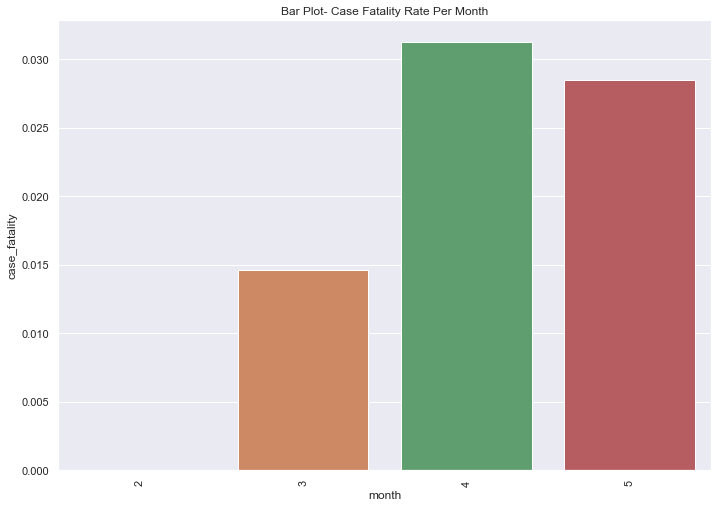

In [215]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


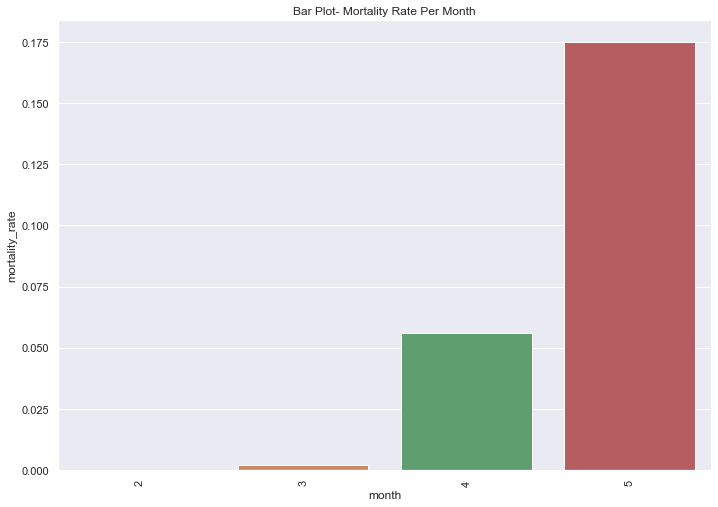

In [216]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


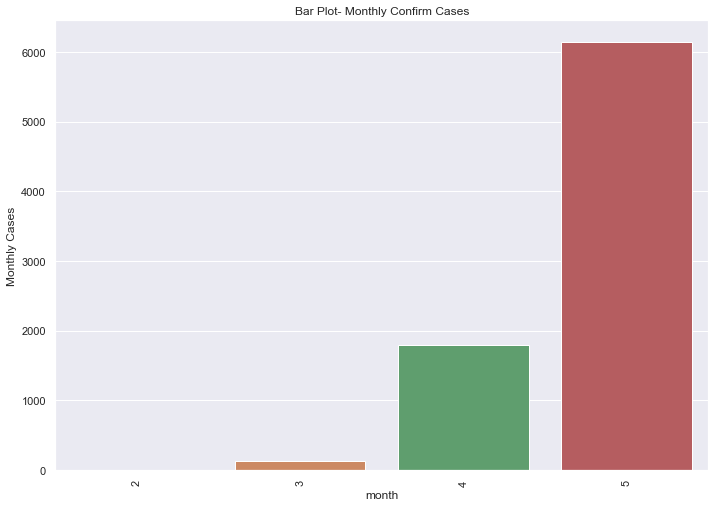

In [217]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
ax.set_ylabel('Monthly Cases')
plt.xticks(rotation = 90)
plt.show()

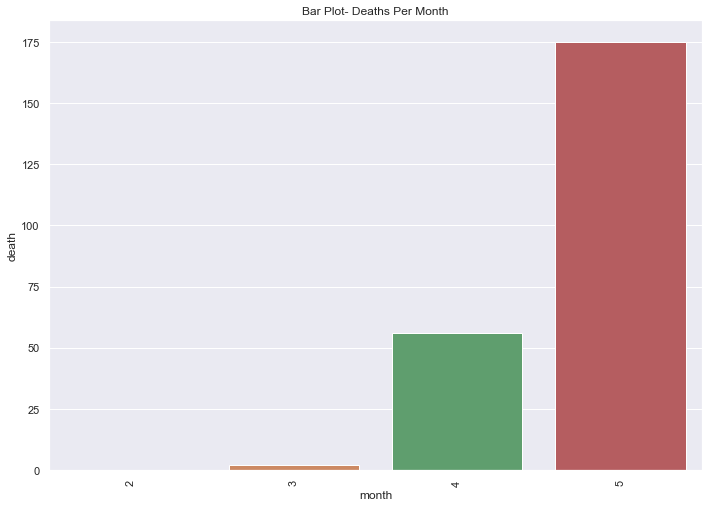

In [218]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

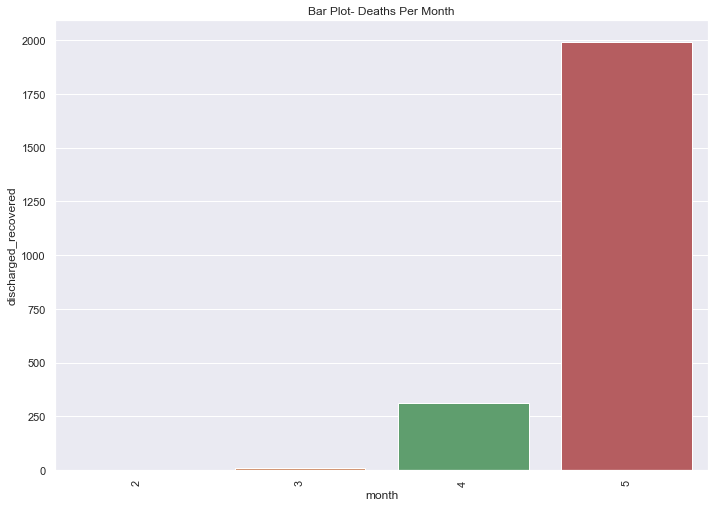

In [219]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

### Death By States

In [220]:
deathby_state.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"3,224","2,600",582,42
1,Kano,883,714,133,36
2,FCT,447,290,143,14
3,Katsina,308,243,51,14
4,Borno,247,111,111,25


In [221]:
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].str.replace(',','')
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].astype('int64')


In [222]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max','No. of Cases (Lab Confirmed)':'max'}).reset_index()
state_stats.head()

,States Affected,No. Discharged,No. of Deaths,No. of Cases (Lab Confirmed)
0,Abia,1,0,7
1,Adamawa,13,2,27
2,Akwa Ibom,12,2,21
3,Anambra,1,0,6
4,Bauchi,156,5,230


In [223]:
deaths_stats = state_stats[['States Affected','No. of Deaths']].sort_values('No. of Deaths', ascending=False)
deaths_stats.head()

,States Affected,No. of Deaths
22,Lagos,42
18,Kano,36
7,Borno,25
13,FCT,14
19,Katsina,14


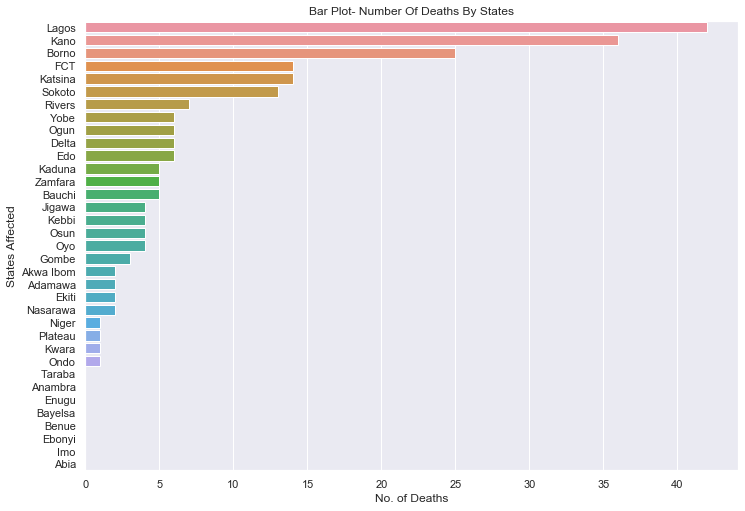

In [224]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=deaths_stats)
ax.set_title('Bar Plot- Number Of Deaths By States')
#plt.yticks(rotation=90)
plt.show()

### Recoveries/Discharged By States

In [225]:
discharged_stats = state_stats[['No. Discharged', 'States Affected']].sort_values('No. Discharged',ascending=False)
discharged_stats.head()

,No. Discharged,States Affected
22,582,Lagos
4,156,Bauchi
13,143,FCT
18,133,Kano
7,111,Borno


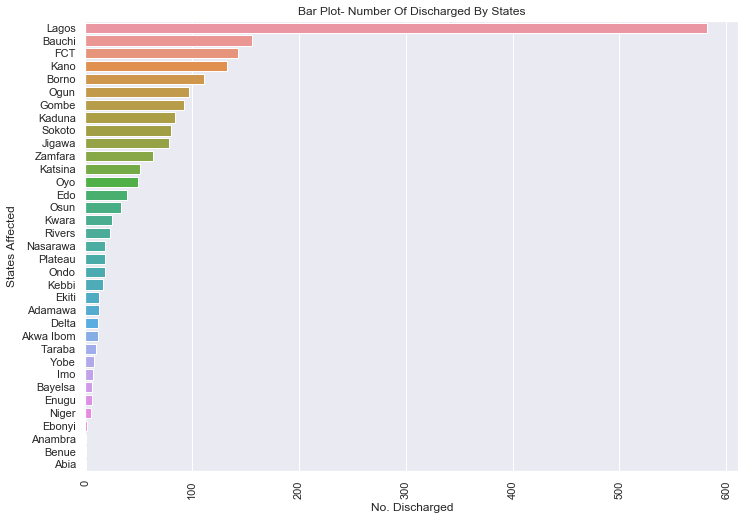

In [226]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. Discharged',y='States Affected', data=discharged_stats)
ax.set_title('Bar Plot- Number Of Discharged By States')
plt.xticks(rotation=90)
plt.show()

In [227]:
confirmed_cases_states = state_stats[['States Affected','No. of Cases (Lab Confirmed)']].sort_values('No. of Cases (Lab Confirmed)', ascending=False)
confirmed_cases_states.head()

,States Affected,No. of Cases (Lab Confirmed)
22,Lagos,3224
18,Kano,883
13,FCT,447
19,Katsina,308
7,Borno,247


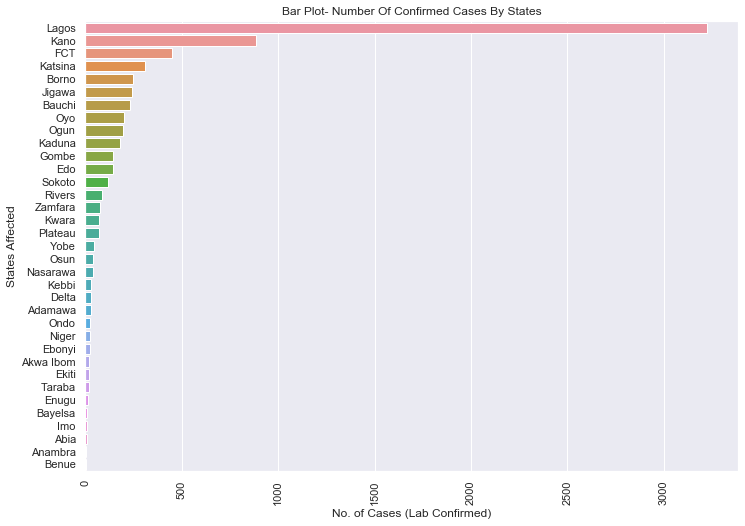

In [228]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Cases (Lab Confirmed)',y='States Affected', data=confirmed_cases_states)
ax.set_title('Bar Plot- Number Of Confirmed Cases By States')
plt.xticks(rotation=90)
plt.show()

### Predicting the Epidemic Situation of Covid19 In Nigeria with Logistic Mathematical Model
My choice of the Logistic Model is simply because it is simple and it conform to the statistical law of Epidemiology

In [229]:
#extract the data we need for building the Logistic Model
model_data = exp_wip_col_clean[['dates', 'death','total_daily_cases']]
model_data.head()

,dates,death,total_daily_cases
0,2020-02-27 15:40:38,0,1
1,2020-02-28 01:00:36,0,0
2,2020-02-29 02:26:52,0,0
3,2020-03-01 22:44:08,0,0
4,2020-03-02 11:53:02,0,0


In [230]:
#create a cummulative sum columns
model_data['cum_daily_cases'] = model_data['total_daily_cases'].cumsum()


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
cum_data = model_data[['dates', 'cum_daily_cases']]
cum_data.head()

,dates,cum_daily_cases
0,2020-02-27 15:40:38,1
1,2020-02-28 01:00:36,1
2,2020-02-29 02:26:52,1
3,2020-03-01 22:44:08,1
4,2020-03-02 11:53:02,1


In [232]:
cum_data.tail()

,dates,cum_daily_cases
91,2020-05-21 15:48:23,7023
92,2020-05-22 15:35:01,7268
93,2020-05-23 15:51:25,7533
94,2020-05-24 15:10:08,7846
95,2020-05-25 15:34:33,8075


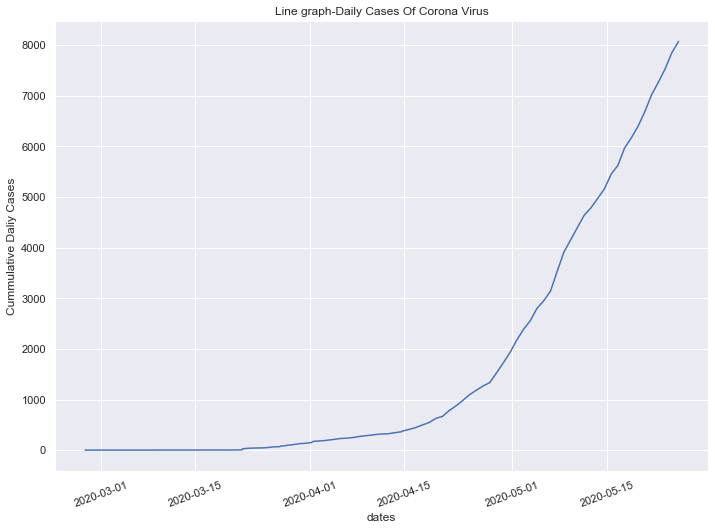

In [233]:
#Line graph of confirm cases over time
ax = sns.lineplot(x='dates', y='cum_daily_cases', data=cum_data)
plt.xticks(rotation=20)
ax.set_title('Line graph-Daily Cases Of Corona Virus')
ax.set_ylabel('Cummulative Daliy Cases')
plt.show()




## Build Logistic Model
The logistic model can be simply rendered as $\huge f(x;a,b,c)$ $\huge =$ $\huge \frac{c}{1 + e^-(x-b)/a}$ 

where :
- a = **Infection speed**
- b = **Day with maximum Infections Occured**
- c = **Total Number of people that would be infected at the end of the pandemic**

In [234]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [235]:
model_data.head()

,dates,death,total_daily_cases,cum_daily_cases
0,2020-02-27 15:40:38,0,1,1
1,2020-02-28 01:00:36,0,0,1
2,2020-02-29 02:26:52,0,0,1
3,2020-03-01 22:44:08,0,0,1
4,2020-03-02 11:53:02,0,0,1


In [236]:
model_data['time_stamp'] = model_data.index


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
model_data.head()

,dates,death,total_daily_cases,cum_daily_cases,time_stamp
0,2020-02-27 15:40:38,0,1,1,0
1,2020-02-28 01:00:36,0,0,1,1
2,2020-02-29 02:26:52,0,0,1,2
3,2020-03-01 22:44:08,0,0,1,3
4,2020-03-02 11:53:02,0,0,1,4


In [238]:
# extract x(days) & y(cases) from dataframe
x = list(model_data.iloc[:,4])
y = list(model_data.iloc[:,3])

In [239]:
# randomly initialize a,b,c
p0 = np.random.exponential(size=3)
p0


array([2.24393072, 0.67420751, 0.03172845])

In [240]:
# set upper and lower bounds a,b,c
bounds = (0,[100000.,3., 100000000.])
bounds

(0, [100000.0, 3.0, 100000000.0])

In [241]:
(a,b,c), cov = curve_fit(logistic_model,x,y,bounds=bounds, p0=p0)

In [243]:
a,b,c

(38.128481129988714, 2.9999983310874123, 2398.7945207836956)

#### Let see Exponential model
This is being considered because we are still at the early stage of the infection. That is the infection rate in still growing

In [244]:
exp_model = model_data[['time_stamp', 'cum_daily_cases']]

In [245]:
#Apply log transformation to the number of infections
exp_model['log_cases'] = np.log(exp_model['cum_daily_cases'])

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [246]:
exp_model.head()

,time_stamp,cum_daily_cases,log_cases
0,0,1,0.0
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,4,1,0.0


### Use Statsmodels's Linear Regression

In [247]:
X = exp_model['time_stamp']
X = sm.add_constant(X)

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [248]:
y = exp_model['log_cases']

In [249]:
modey = sm.OLS(y,X)
result = modey.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_cases   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1677.
Date:                Tue, 26 May 2020   Prob (F-statistic):           9.90e-62
Time:                        15:15:32   Log-Likelihood:                -100.97
No. Observations:                  96   AIC:                             205.9
Df Residuals:                      94   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0404      0.142      0.285      0.7

In [250]:
np.exp(0.0404), np.exp(0.1056)

(1.0412271817780303, 1.11137723668982)

In [251]:
# Linear regression actual function
#y = np.exp(0.0404) * np.exp(0.1056) **t
def linear_pred(t):
    return np.exp(0.0404) * np.exp(0.1056) ** t

In [267]:
exp_model['predictions'] = exp_model['time_stamp'].apply(linear_pred)
exp_model.head()


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,time_stamp,cum_daily_cases,log_cases,predictions
0,0,1,0.0,1.041227
1,1,1,0.0,1.157196
2,2,1,0.0,1.286082
3,3,1,0.0,1.429322
4,4,1,0.0,1.588516


No handles with labels found to put in legend.


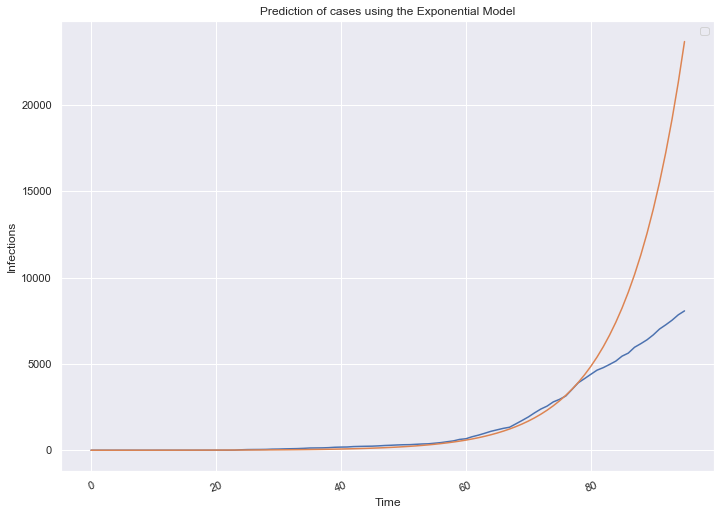

In [259]:
ax = sns.lineplot(x='time_stamp', y='cum_daily_cases', data=exp_model)
ax = sns.lineplot(x='time_stamp', y='predictions', data=exp_model)
plt.xticks(rotation=20)
ax.set_title('Prediction of cases using the Exponential Model')
ax.set_ylabel('Infections')
ax.set_xlabel('Time')
plt.legend()
plt.show()


#### Predict Infection cases One week After the current last day

In [263]:
cases_in_one_week = len(exp_model['time_stamp']) + 7
cases_in_one_week


103

In [265]:
t103 = np.exp(0.0404) *  np.exp(0.1056)**cases_in_one_week
t103

55116.25716558372